### Previsione di opportunità di Cross Sell di assicurazioni

Il cliente è una compagnia di assicurazioni che ha fornito un'assicurazione sanitaria ai suoi clienti, adesso hanno bisogno del tuo aiuto per costruire un modello predittivo in grado di prevedere se gli assicurati dell'anno passato potrebbero essere interessati ad acquistare anche un'assicurazione per il proprio veicolo.

Il dataset è composto dalle seguenti proprietà:

* id: id univoco dell'acquirente.
* Gender: sesso dell'acquirente.
* Age: età dell'acquirente.
* Driving_License: 1 se l'utente ha la patente di guida, 0 altrimenti.
* Region_Code: codice univoco della regione dell'acquirente.
* Previously_Insured: 1 se l'utente ha già un veicolo assicurato, 0 altrimenti.
* Vehicle_Age: età del veicolo
* Vehicle_Damage: 1 se l'utente ha danneggiato il veicolo in passato, 0 altrimenti.
* Annual_Premium: la cifra che l'utente deve pagare come premio durante l'anno.
* Policy_Sales_Channel: codice anonimizzato del canale utilizzato per la proposta (es. per email, per telefono, di persona, ecc...)
* Vintage: numero di giorni dalla quale l'utente è cliente dell'azienda.
* Response: 1 se l'acquirente ha risposto positivamente alla proposta di vendita, 0 altrimenti.


L'obiettivo del modello è prevedere il valore di Response.

Tip Fai attenzione alla distribuzione delle classi, dai uno sguardo a questo approfondimento (https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). In caso di classi sbilanciate puoi provare a:

Penalizzare la classe più frequente (ricorda l'argomento class_weight)
Utilizzare l'oversampling o l'undersampling (https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/). 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("../datasets/insurance_cross_sell.csv", index_col=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#Dataset Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB
None


In [4]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
#checking missing values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: xlabel='Response', ylabel='count'>

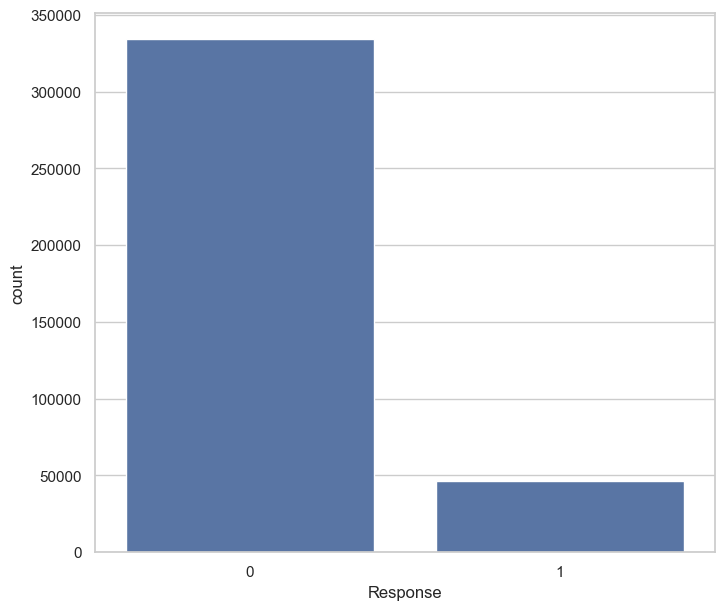

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Response'],data=df)

<Axes: xlabel='Age', ylabel='count'>

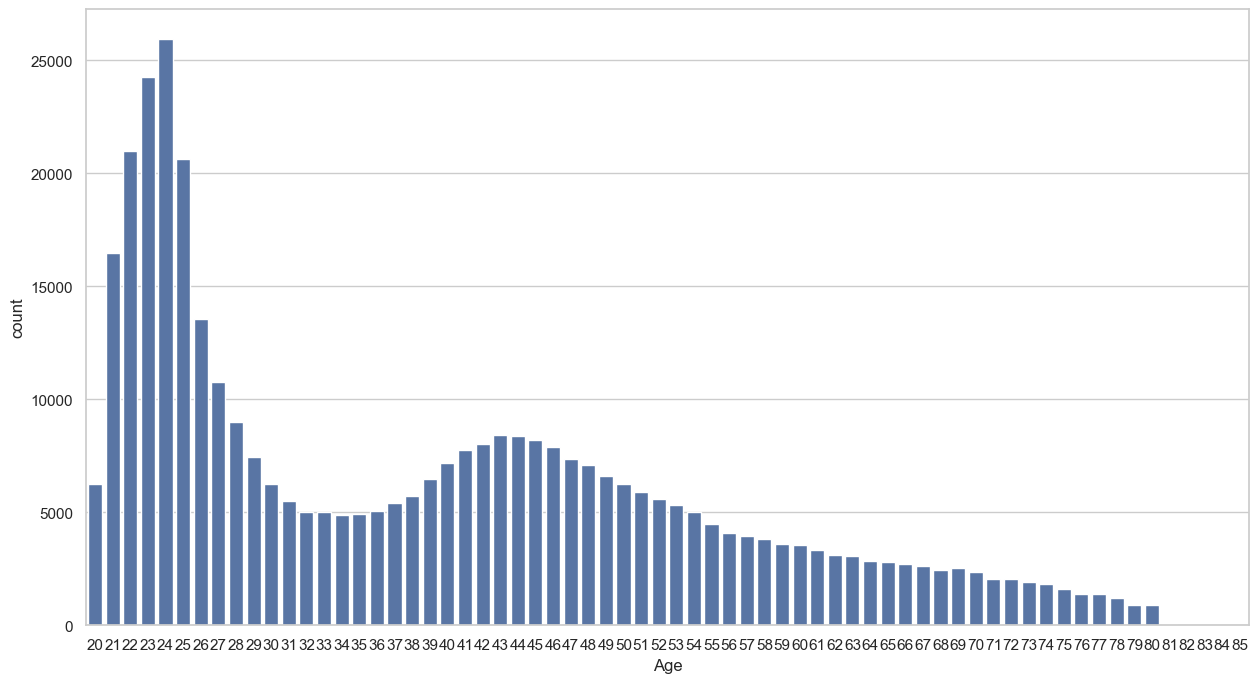

In [7]:
#Distribution of Age 
plt.figure(figsize=(15,8))
sns.countplot(x=df['Age'],data=df)

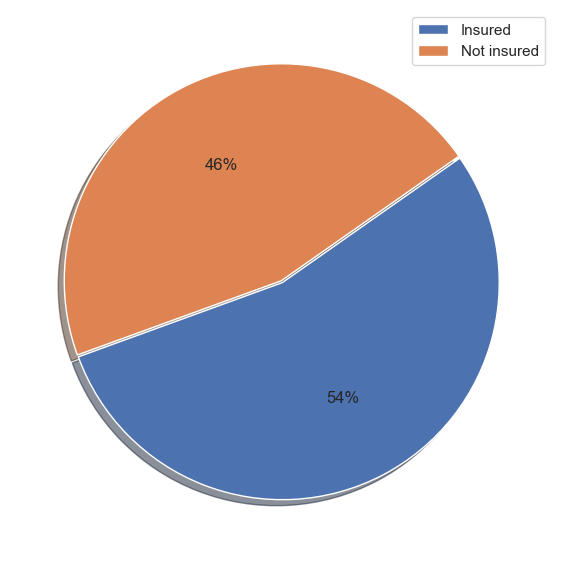

In [8]:
plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

/var/folders/sh/1cl9pkxd6cb79twb1vhhxcm40000gn/T/ipykernel_7907/14887479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, color='purple')


<Axes: xlabel='Annual_Premium', ylabel='Density'>

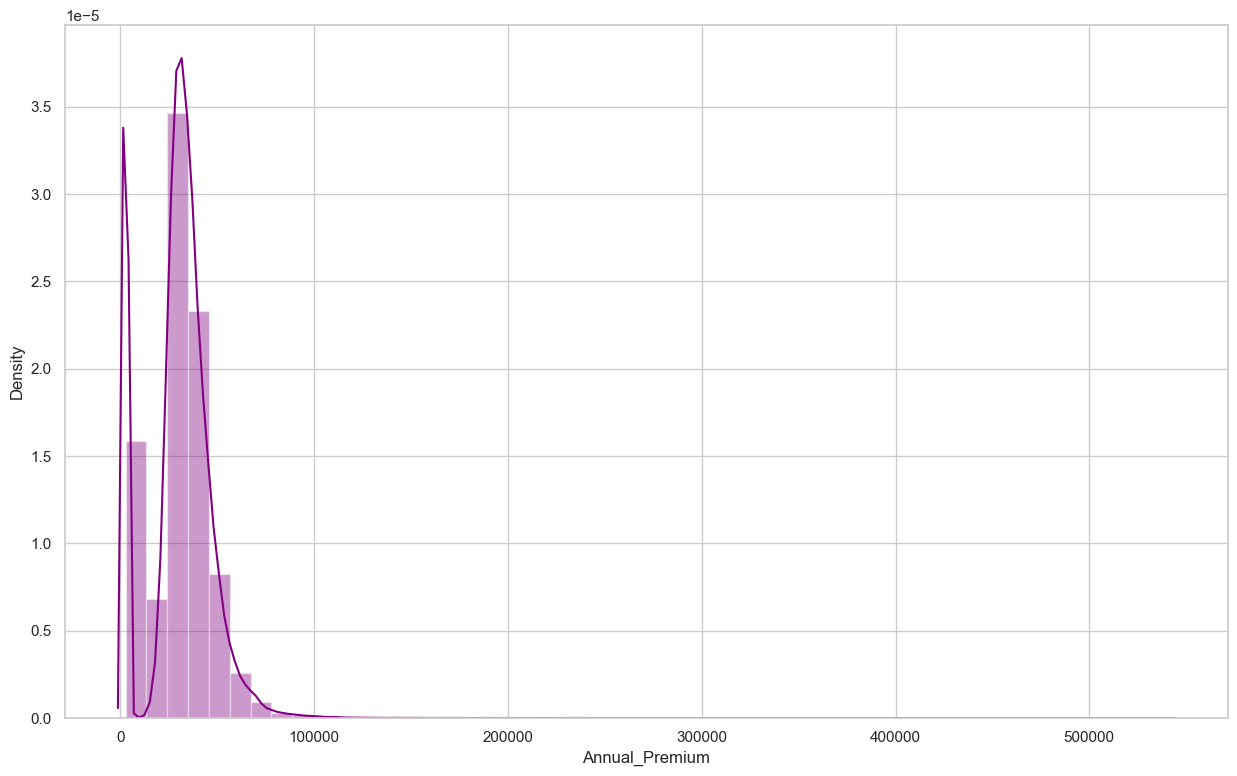

In [9]:
plt.figure(figsize=(15,9))
a=df['Annual_Premium']
sns.distplot(a, color='purple')

In [10]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
df['Vehicle_Age']= df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
2,0,76,1,3.0,0,1,No,33536.0,26.0,183,0
3,0,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
4,0,21,1,11.0,1,0,No,28619.0,152.0,203,0
5,1,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [12]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [13]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [24]:
X=df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,0,74,1,26.0,1,1,0,30170.0,26.0,88,0
381106,0,30,1,37.0,1,0,0,40016.0,152.0,131,0
381107,0,21,1,30.0,1,0,0,35118.0,160.0,161,0


In [15]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [16]:
fill_mode = lambda col: col.fillna(col.mode())
X = X.apply(fill_mode, axis=0)
df = df.apply(fill_mode, axis=0)

In [17]:
# check for imbalance in data 
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [18]:
#Resampling
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


# Splitting the data in train and test sets

In [19]:
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((468158, 8), (200640, 8), (468158,), (200640,))

In [20]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [21]:
#Importing Logistic Regression
model= LogisticRegression(random_state=42)
model=model.fit(X_train, y_train)
#Making prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

In [22]:
# Evaluation
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)

recall_score :  1.0
precision_score : 1.0
f1_score : 1.0
accuracy_score : 1.0
ROC_AUC Score: 1.0
